In [3]:
#Importing the needed packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeigborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [23]:
expedia_df = pd.read_csv('training_set_VU_DM_2014.csv')
test_df = pd.read_csv('test_set_VU_DM_2014.csv')

In [25]:
expedia_df.shape

(4958347, 54)

In [26]:
expedia_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [8]:
expedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [32]:
expedia = expedia_df.drop(['srch_id', 'date_time', 'site_id','srch_children_count', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'], axis=1)



In [12]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 50 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_bool       int64
srch_query_affinity_s

In [28]:
test = test_df.drop(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff','comp2_rate','comp2_inv','comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate','comp4_inv','comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff','srch_children_count'], axis=1)



In [29]:
test.shape

(4959183, 10)

In [22]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 10 columns):
prop_country_id              int64
prop_id                      int64
prop_starrating              int64
prop_review_score            float64
prop_brand_bool              int64
prop_location_score1         float64
prop_location_score2         float64
prop_log_historical_price    float64
price_usd                    float64
promotion_flag               int64
dtypes: float64(5), int64(5)
memory usage: 378.4 MB


In [33]:
expedia.shape

(4958347, 14)

In [34]:
expedia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 14 columns):
prop_country_id              int64
prop_id                      int64
prop_starrating              int64
prop_review_score            float64
prop_brand_bool              int64
prop_location_score1         float64
prop_location_score2         float64
prop_log_historical_price    float64
position                     int64
price_usd                    float64
promotion_flag               int64
click_bool                   int64
gross_bookings_usd           float64
booking_bool                 int64
dtypes: float64(6), int64(8)
memory usage: 529.6 MB


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'4'),
 Text(0,0,'7'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'30'),
 Text(0,0,'31'),
 Text(0,0,'32'),
 Text(0,0,'33'),
 Text(0,0,'34'),
 Text(0,0,'35'),
 Text(0,0,'37'),
 Text(0,0,'38'),
 Text(0,0,'39'),
 Text(0,0,'40'),
 Text(0,0,'41'),
 Text(0,0,'42'),
 Text(0,0,'44'),
 Text(0,0,'45'),
 Text(0,0,'46'),
 Text(0,0,'47'),
 Text(0,0,'48'),
 Text(0,0,'50'),
 Text(0,0,'51'),
 Text(0,0,'53'),
 Text(0,0,'55'),
 Text(0,0,'56'),
 Text(0,0,'57'),
 Text(0,0,'59'),
 Text(0,0,'60'),
 Text(0,0,'61'),
 Text(0,0,'62'),
 Text(0,0,'63'),
 Text(0,0,'65'),
 Text(0,0,'68'),
 Text(0,0,'69'),
 Text(0,0,'70'),
 Text(0,0,'71'),
 Text(0,0,'72'),
 Text(0,0,'73'),
 Text(0,0,'74'),
 Text(0,0,'76'),
 Text(0,0,'77'),
 T

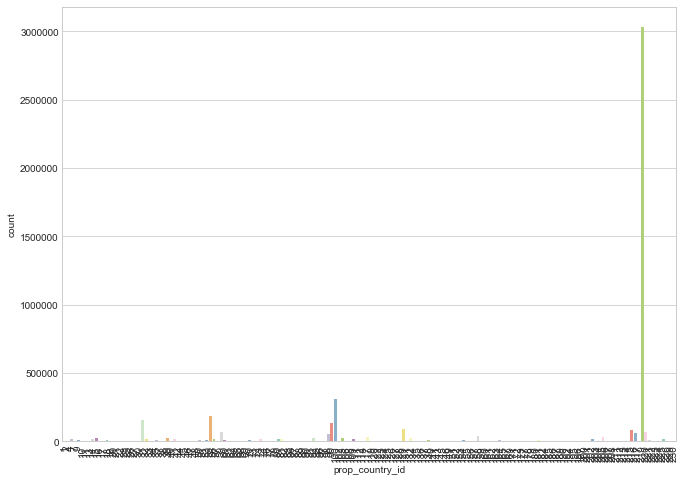

In [41]:
#in which countries are most hotels located
fig, ax = plt.subplots()
fig.set_size_inches(11,8)
g=sns.countplot('prop_country_id',data=expedia.sort_values(by=['prop_country_id']),palette='Set3')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
